<a href="https://colab.research.google.com/github/nayvti380/Data-Science/blob/main/Data_Sciece_09_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets


In [ ]:
df = datasets.load_iris()
df = pd.DataFrame(data = df.data, columns = df.feature_names)
type(df['petal length (cm)'])

pandas.core.series.Series

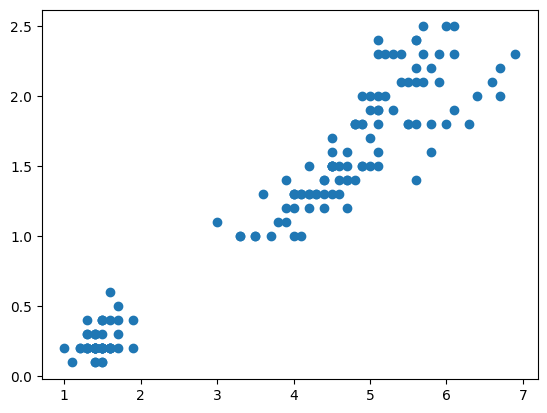

In [ ]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

KMeans

Achando o número decluesters


In [ ]:
inercia = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df)
  inercia.append(kmeans.inertia_)
inercia

[152.34795176035797,
 78.85566582597727,
 57.22847321428572,
 49.97767846030012,
 48.03652015226155,
 34.43653839638622,
 32.21851002506266,
 28.347539188881296,
 27.945927327058907]

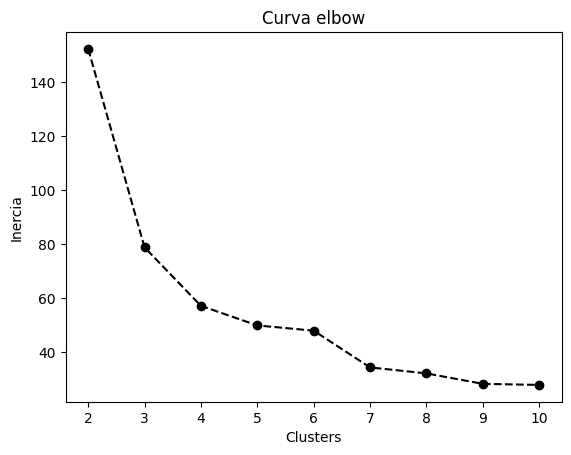

In [ ]:
plt.plot(range(2,11),inercia, marker='o', linestyle='--', color='black')

plt.title("Curva elbow")
plt.ylabel('Inercia')
plt.xlabel('Clusters')
plt.show()

# 3 cluster o ideal


### placeholder

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
kmeans_final = KMeans(n_clusters = 3)
kmeans_final.fit(df)
clusters = kmeans_final.cluster_centers_
clusters

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [ ]:
pred = kmeans_final.predict(df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
df['Cluster'] = pred
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


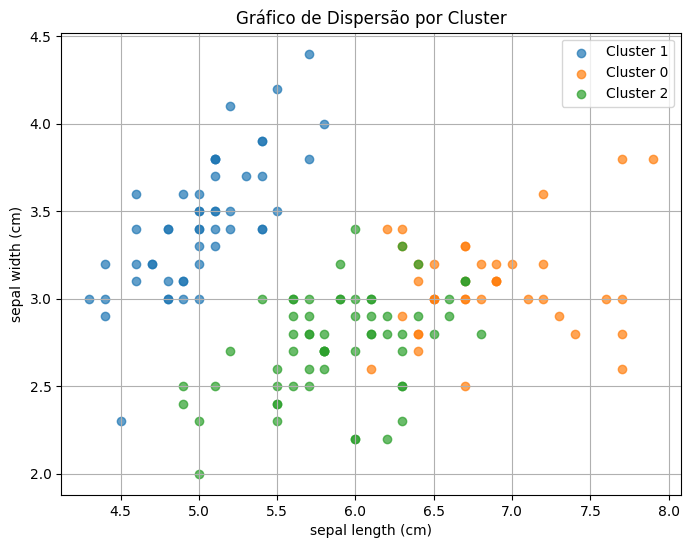

In [ ]:
# Separando as colunas para o gráfico
coluna_sepal_length = df.columns[0]  # Substitua por nome da coluna do eixo X
coluna_sepal_width = df.columns[1]  # Substitua por nome da coluna do eixo Y
coluna_cluster = "Cluster"  # Substitua se o nome da coluna for diferente

# Criando o gráfico de dispersão
plt.figure(figsize=(8, 6))  # Ajuste o tamanho do gráfico se necessário

# Criando um scatter plot para cada cluster
for cluster in df[coluna_cluster].unique():
    dados_cluster = df[df[coluna_cluster] == cluster]
    plt.scatter(
        dados_cluster[coluna_sepal_length],
        dados_cluster[coluna_sepal_width],
        label=f"Cluster {cluster}",
        alpha=0.7,
    )

# Personalizando o gráfico
plt.xlabel(coluna_sepal_length)
plt.ylabel(coluna_sepal_width)
plt.title("Gráfico de Dispersão por Cluster")
plt.legend()
plt.grid(True)

# Mostrando o gráfico
plt.show()

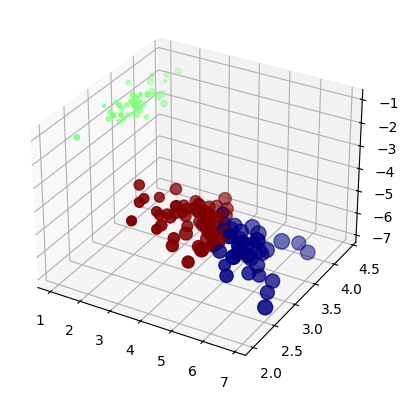

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['petal length (cm)']#invertido
y = df['sepal width (cm)']#invertido
z = -df['petal length (cm)']
s = df['petal width (cm)']
c = df['Cluster']

img = ax.scatter(x, y, z, c=c, s=s*50, cmap=mpl.colormaps['jet'])
#fig.colorbar(img)
plt.show()

In [ ]:
type(df['petal length (cm)'])

pandas.core.series.Series

In [ ]:
df['Cluster'] = pd.to_numeric(df['Cluster'], downcast="integer")

In [ ]:
df["Cluster"]

,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,0
146,2
147,0
148,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.146667
std,0.828066,0.435866,1.765298,0.762238,0.805907
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df[ (df['sepal length (cm)'] < 5) ^ (df['petal length (cm)'] < 4) ]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
7,5.0,3.4,1.5,0.2,1
10,5.4,3.7,1.5,0.2,1
14,5.8,4.0,1.2,0.2,1
15,5.7,4.4,1.5,0.4,1
16,5.4,3.9,1.3,0.4,1
17,5.1,3.5,1.4,0.3,1
18,5.7,3.8,1.7,0.3,1
